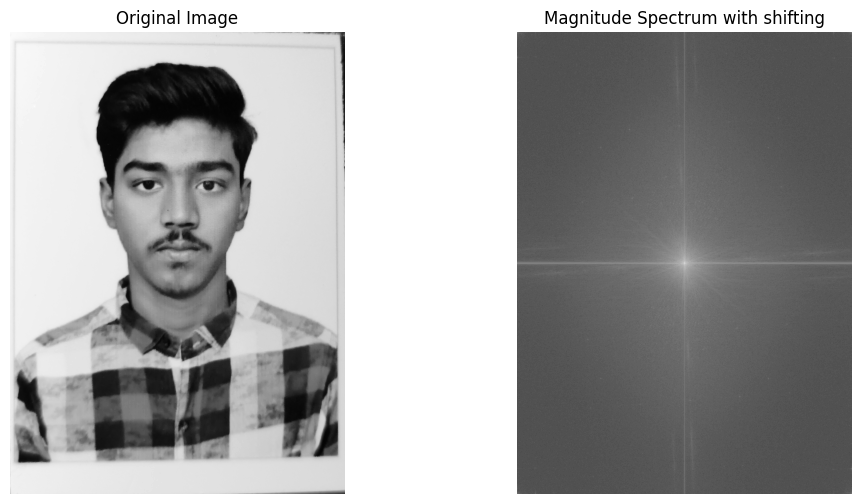

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("Aslam.jpg", cv2.IMREAD_GRAYSCALE)
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_shift))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum with shifting')
plt.axis('off')

plt.show()


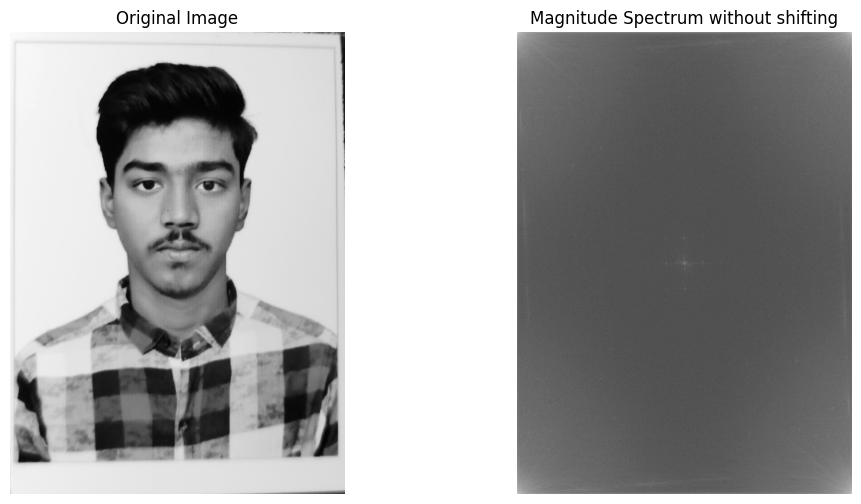

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread(r"Aslam.jpg", cv2.IMREAD_GRAYSCALE)
f_transform = np.fft.fft2(image)
magnitude_spectrum = 20 * np.log(np.abs(f_transform))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum without shifting')
plt.axis('off')
plt.show()


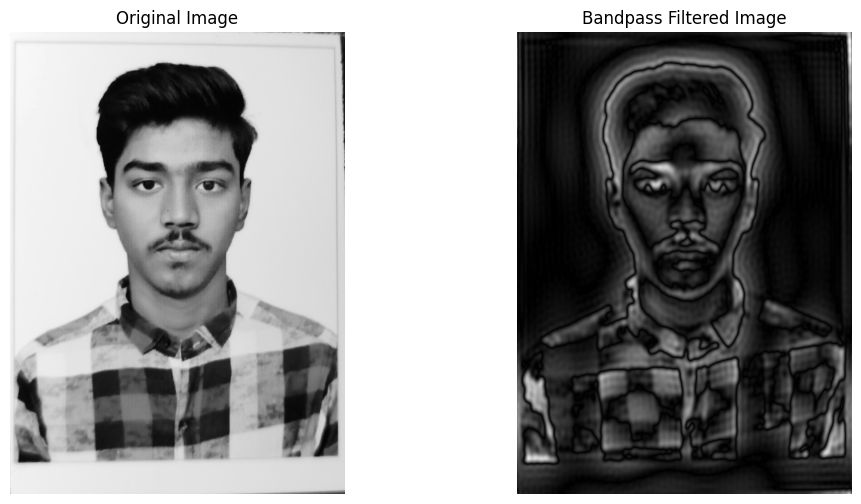

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def bandpass_filter(shape, d0, w):
    rows, cols = shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols), np.float32)
    
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - crow)**2 + (j - ccol)**2)
            if d0 - w / 2 <= distance <= d0 + w / 2:
                mask[i, j] = 1
    
    return mask
image = cv2.imread("Aslam.jpg", cv2.IMREAD_GRAYSCALE)
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)
d0 = 30 
w = 50
mask = bandpass_filter(image.shape, d0, w)
filtered_f_shift = f_shift * mask
f_ishift = np.fft.ifftshift(filtered_f_shift)
restored_image = np.fft.ifft2(f_ishift)
restored_image = np.abs(restored_image)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(restored_image, cmap='gray')
plt.title('Bandpass Filtered Image')
plt.axis('off')
plt.show()


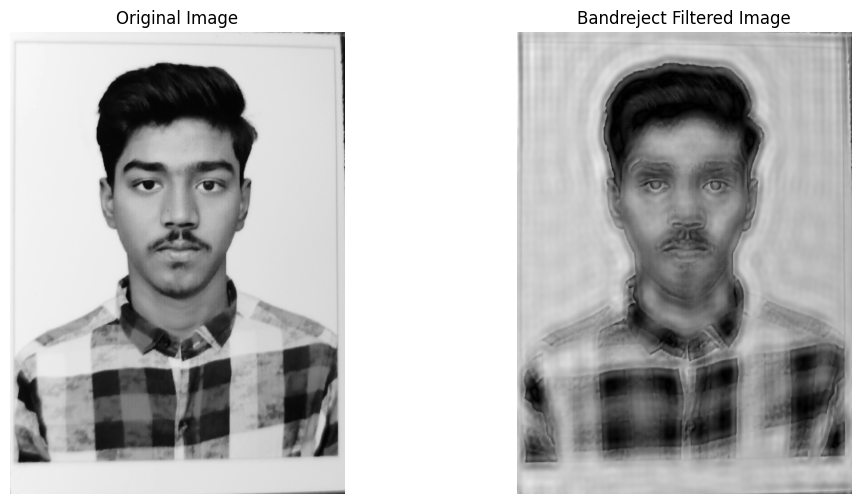

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def bandreject_filter(shape, d0, w):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.float32)
    
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - crow)**2 + (j - ccol)**2)
            if d0 - w / 2 <= distance <= d0 + w / 2:
                mask[i, j] = 0
    
    return mask
image = cv2.imread("Aslam.jpg", cv2.IMREAD_GRAYSCALE)
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)
d0 = 30 
w = 30  
mask = bandreject_filter(image.shape, d0, w)
filtered_f_shift = f_shift * mask
f_ishift = np.fft.ifftshift(filtered_f_shift)
restored_image = np.fft.ifft2(f_ishift)
restored_image = np.abs(restored_image)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(restored_image, cmap='gray')
plt.title('Bandreject Filtered Image')
plt.axis('off')
plt.show()


(2340, 1692)
(2340, 1692)


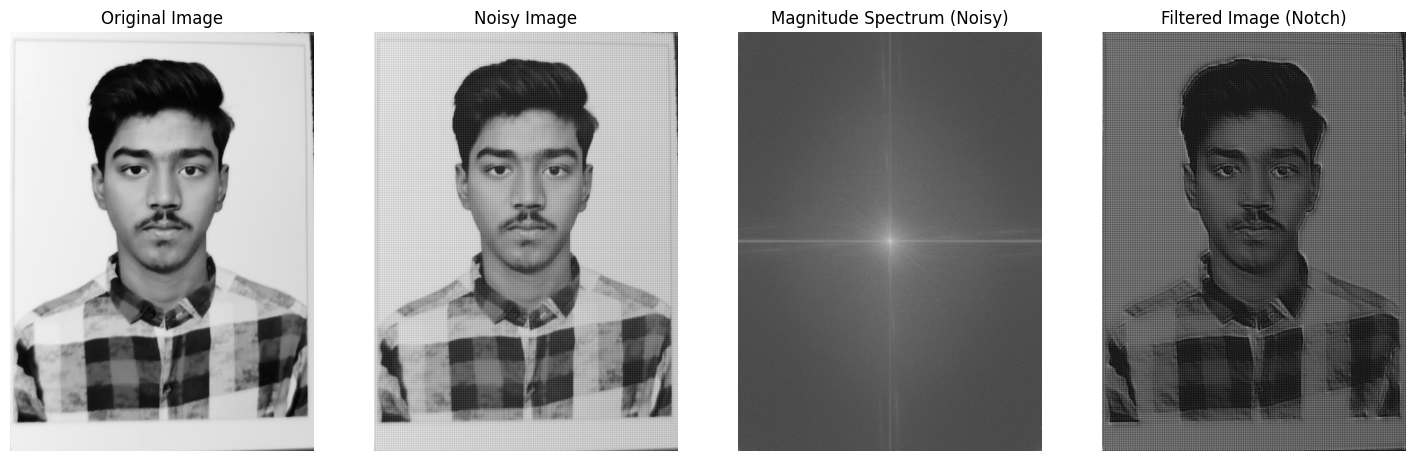

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def notch_filter(shape, u_k, v_k, d0, n):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.float32)

    for i in range(rows):
        for j in range(cols):
            d1 = np.sqrt((i - (crow + u_k))**2 + (j - (ccol + v_k))**2)
            d2 = np.sqrt((i - (crow - u_k))**2 + (j - (ccol - v_k))**2)
            
            mask[i, j] = 1 / (1 + (d0 / (d1 + 1e-5))**(2*n))
            mask[i, j] *= 1 / (1 + (d0 / (d2 + 1e-5))**(2*n))
    
    return mask
image = cv2.imread("Aslam.jpg", cv2.IMREAD_GRAYSCALE)
print(image.shape)
rows, cols = image.shape
x = np.arange(cols)
y = np.arange(rows)
x, y = np.meshgrid(x, y)
periodic_noise = 20 * np.sin(2 * np.pi * 0.1 * x) + 20 * np.sin(2 * np.pi * 0.1 * y)
print(periodic_noise.shape)
noisy_image = image + periodic_noise
f_transform = np.fft.fft2(noisy_image)
f_shift = np.fft.fftshift(f_transform)
u_k, v_k = 30, 30 
d0 = 40 
n = 2 
notch_mask = notch_filter(noisy_image.shape, u_k, v_k, d0, n)
filtered_f_shift = f_shift * notch_mask
f_ishift = np.fft.ifftshift(filtered_f_shift)
restored_image = np.fft.ifft2(f_ishift)
restored_image = np.abs(restored_image)
plt.figure(figsize=(18, 6))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(np.log(1 + np.abs(f_shift)), cmap='gray')
plt.title('Magnitude Spectrum (Noisy)')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(restored_image, cmap='gray')
plt.title('Filtered Image (Notch)')
plt.axis('off')
plt.show()


(2340, 1692)
(2340, 1692)


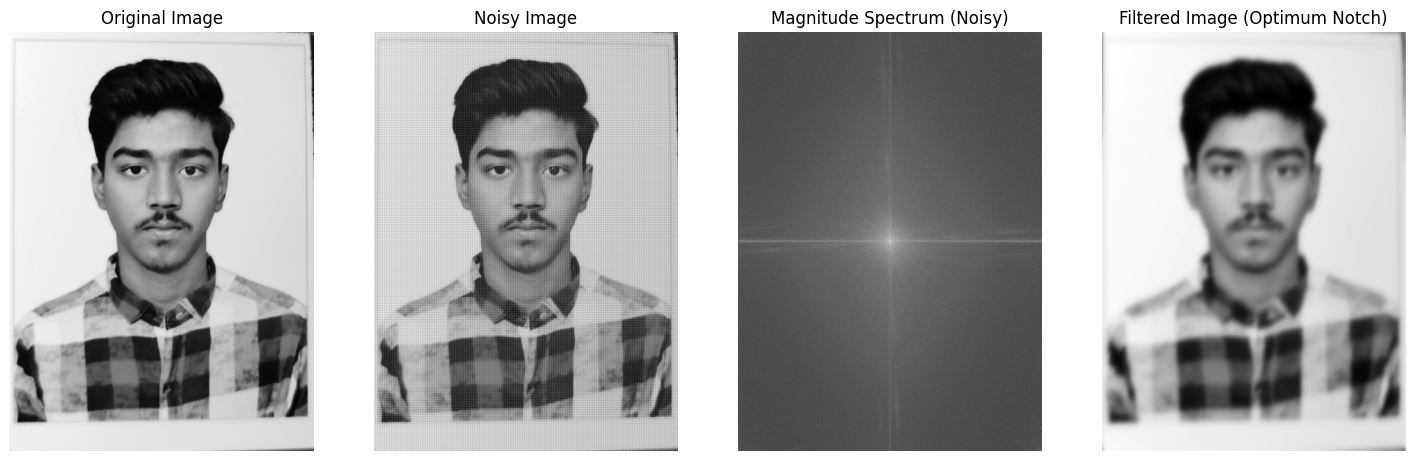

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def optimum_notch_filter(shape, u_k, v_k, d0, n):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.float32)

    for i in range(rows):
        for j in range(cols):
            d1 = np.sqrt((i - (crow + u_k))**2 + (j - (ccol + v_k))**2)
            d2 = np.sqrt((i - (crow - u_k))**2 + (j - (ccol - v_k))**2)

            mask[i, j] = 1 / (1 + (d1 / d0)**(2 * n)) * 1 / (1 + (d2 / d0)**(2 * n))
    
    return mask
image = cv2.imread("Aslam.jpg", cv2.IMREAD_GRAYSCALE)
print(image.shape)
rows, cols = image.shape
x = np.arange(cols)
y = np.arange(rows)
x, y = np.meshgrid(x, y)
periodic_noise = 20 * np.sin(2 * np.pi * 0.1 * x) + 20 * np.sin(2 * np.pi * 0.1 * y)
print(periodic_noise.shape)
noisy_image = image + periodic_noise
f_transform = np.fft.fft2(noisy_image)
f_shift = np.fft.fftshift(f_transform)
u_k, v_k = 30, 30 
d0 = 40  
n = 2 
optimum_notch_mask = optimum_notch_filter(noisy_image.shape, u_k, v_k, d0, n)
filtered_f_shift = f_shift * optimum_notch_mask
f_ishift = np.fft.ifftshift(filtered_f_shift)
restored_image = np.fft.ifft2(f_ishift)
restored_image = np.abs(restored_image)
plt.figure(figsize=(18, 6))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(np.log(1 + np.abs(f_shift)), cmap='gray')
plt.title('Magnitude Spectrum (Noisy)')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(restored_image, cmap='gray')
plt.title('Filtered Image (Optimum Notch)')
plt.axis('off')
plt.show()


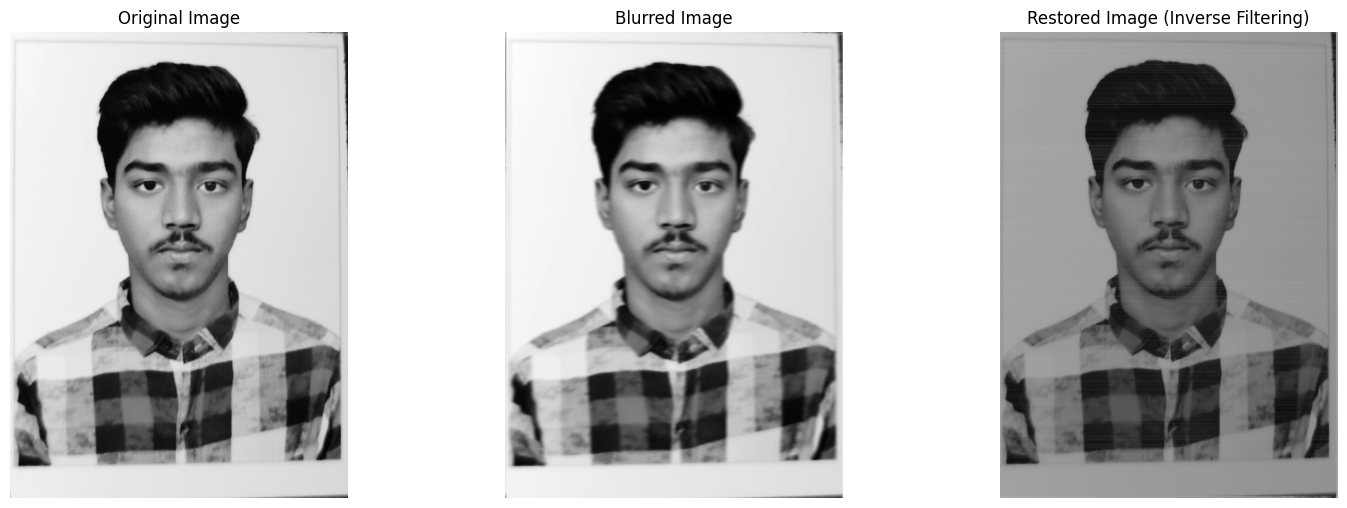

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
def create_motion_blur_kernel(size, angle):
    kernel = np.zeros((size, size))
    kernel[int((size - 1) / 2), :] = np.ones(size)
    kernel = np.roll(kernel, int(angle / 180 * size), axis=1)
    kernel = kernel / size
    return kernel
def apply_motion_blur(image, kernel_size, angle):
    kernel = create_motion_blur_kernel(kernel_size, angle)
    blurred_image = convolve2d(image, kernel, mode='same', boundary='wrap')
    return blurred_image
def inverse_filter(image, degradation_function):
    F = np.fft.fft2(image)
    H = np.fft.fft2(degradation_function, s=image.shape)
    H[H == 0] = 1  # Avoid division by zero
    G = F / H
    restored_image = np.fft.ifft2(G)
    return np.abs(restored_image)
image_path = "Aslam.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = image.astype(np.float32) / 255  
kernel_size = 21  
angle = 45 
blurred_image = apply_motion_blur(image, kernel_size, angle)
degradation_function = create_motion_blur_kernel(kernel_size, angle)
restored_image_inv = inverse_filter(blurred_image, degradation_function)
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(restored_image_inv, cmap='gray')
plt.title('Restored Image (Inverse Filtering)')
plt.axis('off')
plt.tight_layout()
plt.show()


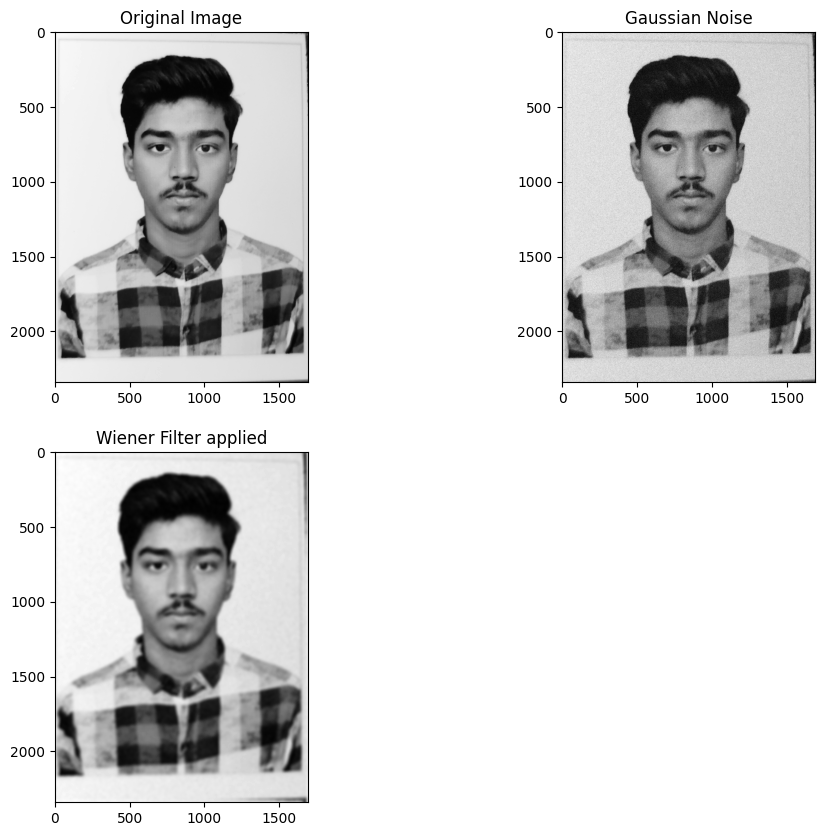

In [20]:
import os
import numpy as np
from numpy.fft import fft2, ifft2
from scipy.signal import convolve2d
from scipy.signal.windows import gaussian  # Corrected import
import matplotlib.pyplot as plt

def blur(img, mode='box', kernel_size=3):
    dummy = np.copy(img)
    if mode == 'box':
        h = np.ones((kernel_size, kernel_size)) / kernel_size ** 2
    elif mode == 'gaussian':
        h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
        h = np.dot(h, h.transpose())
        h /= np.sum(h)
    elif mode == 'motion':
        h = np.eye(kernel_size) / kernel_size
    dummy = convolve2d(dummy, h, mode='valid')
    return dummy

def add_gaussian_noise(img, sigma):
    gauss = np.random.normal(0, sigma, np.shape(img))
    noisy_img = img + gauss
    noisy_img[noisy_img < 0] = 0
    noisy_img[noisy_img > 255] = 255
    return noisy_img

def wiener_filter(img, kernel, K):
    kernel /= np.sum(kernel)
    dummy = np.copy(img)
    dummy = fft2(dummy)
    kernel = fft2(kernel, s=img.shape)
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    dummy = dummy * kernel
    dummy = np.abs(ifft2(dummy))
    return dummy

def gaussian_kernel(kernel_size=3):
    h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
    h = np.dot(h, h.transpose())
    h /= np.sum(h)
    return h

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

file_name = os.path.join(r"Aslam.jpg") 
img = rgb2gray(plt.imread(file_name))
noisy_img = add_gaussian_noise(img, sigma=35)
kernel = gaussian_kernel(30)
filtered_img = wiener_filter(noisy_img, kernel, K=50)

display = [img,  noisy_img, filtered_img]
label = ['Original Image', 'Gaussian Noise', 'Wiener Filter applied']

fig = plt.figure(figsize=(12, 10))
for i in range(len(display)):
    fig.add_subplot(2, 2, i+1)
    plt.imshow(display[i], cmap='gray')
    plt.title(label[i])

plt.show()


In [11]:
import scipy
print(scipy.__version__)

1.13.0
